In [60]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.pyplot import figure
import matplotlib
import numpy as np

import plotly.express as px
import seaborn as sns
from scipy.stats import ttest_ind
import geopandas as gpd
from geopandas import GeoDataFrame

%matplotlib inline

In [102]:
path_EV = '../Processed_Data/Ev_sales.csv'
path_climate = '../Processed_Data/climate_state.csv'
path_income = '../Processed_Data/incomes.csv'
path_tax = '../Processed_Data/policy_state.csv'
path_gdp = '../Processed_Data/gdp.csv'

In [103]:

df_gdp = pd.read_csv(path_gdp).sort_values('GeoName').set_index('GeoName').drop(columns=['Unnamed: 0'])

df_tax = pd.read_csv(path_tax).sort_values('State').set_index('State')


df_EV = pd.read_csv(path_EV).sort_values('State').set_index('State').drop(columns=['Unnamed: 0'])
df_climate = pd.read_csv(path_climate).drop(columns=['Unnamed: 0'])
df_income = pd.read_csv(path_income).sort_values('GeoName').set_index('GeoName').drop(columns=['Unnamed: 0'])

In [104]:
df_gdp['Avg'] = df_gdp[['2016','2017','2018','2019']].mean(axis=1)
df_EV['Avg'] = df_EV[['2016','2017','2018','2019']].mean(axis=1)
df_income['Avg'] = df_income[['2016','2017','2018','2019']].mean(axis=1)


In [105]:
d = pd.DataFrame()
d['2016'] = df_climate.iloc[26]
d['2017'] = df_climate.iloc[27]
d['2018'] = df_climate.iloc[28]
d['2019'] = df_climate.iloc[29]
d['Avg'] = d[['2016','2017','2018','2019']].mean(axis=1)

In [112]:
col = ['State','Temp','EV_sale','Tax','GDP','Income']
data = pd.DataFrame(columns = col)
data['State']=df_income.index
data = data.set_index('State')
data['Temp'] = d['Avg']
data['EV_sale']=df_EV['Avg']
data['Tax']=df_tax['Total']
data['GDP']=df_gdp['Avg']
data['Income']=df_income['Avg']
data = data.drop(['District of Columbia','Hawaii','Kansas'])
data.head()

,Temp,EV_sale,Tax,GDP,Income
State,,,,,
Alabama,65.050,646.00,8.0,119534.600,2.167256e+06
Alaska,30.950,119.25,6.0,27927.875,4.506928e+05
Arizona,61.950,4979.50,24.0,187236.975,3.029231e+06
Arkansas,61.925,324.50,6.0,69827.475,1.309460e+06
California,59.725,116797.25,133.0,1492724.200,2.337879e+07


In [115]:
dd = data.reset_index()

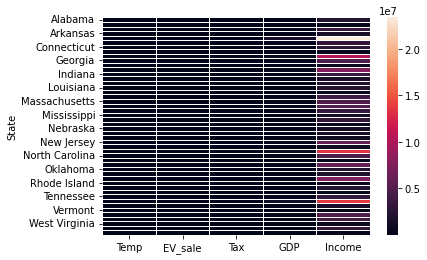

In [118]:

ax = sns.heatmap(data, linewidth=0.5)
plt.show()

In [124]:
d_drop = data.drop("California")
d_drop.style.background_gradient(cmap='Blues')

,Temp,EV_sale,Tax,GDP,Income
State,,,,,
Alabama,65.050000,646.000000,8.000000,119534.600000,2167255.925000
Alaska,30.950000,119.250000,6.000000,27927.875000,450692.775000
Arizona,61.950000,4979.500000,24.000000,187236.975000,3029230.600000
Arkansas,61.925000,324.500000,6.000000,69827.475000,1309460.175000
Colorado,46.925000,5731.250000,37.000000,200417.975000,3043385.025000
Connecticut,50.825000,2635.000000,28.000000,142608.125000,2822894.050000
Delaware,57.400000,546.750000,12.000000,32602.100000,522977.750000
Florida,72.700000,10581.750000,15.000000,559062.325000,10249916.325000
Georgia,65.725000,4001.000000,7.000000,309051.350000,4792214.800000


<AxesSubplot:ylabel='State'>

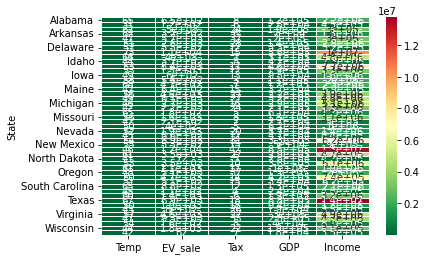

In [125]:
sns.heatmap(d_drop, cmap='RdYlGn_r', linewidths=0.5, annot=True)

<AxesSubplot:>

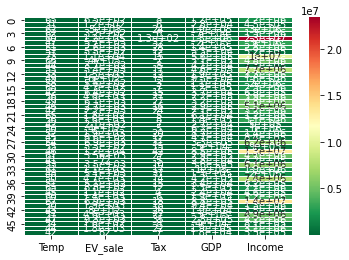

In [141]:
d_var = dd[['Temp','EV_sale','Tax','GDP','Income']]
d_var_set = d_var.set_index('Temp')
sns.heatmap(d_var, cmap='RdYlGn_r', linewidths=0.5, annot=True)

In [142]:
def plot_heatmap(title, df_in, figsize=(6, 6)):
    df_corr = df_in.corr()
    # create a color palettte
    cmap = sns.diverging_palette(230, 10, as_cmap=True)
    # display the heatmap
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(df_corr, square=True, cbar=True, annot=True, cmap=cmap, linewidths=1, vmin=-1)
    ax.set_title(title)

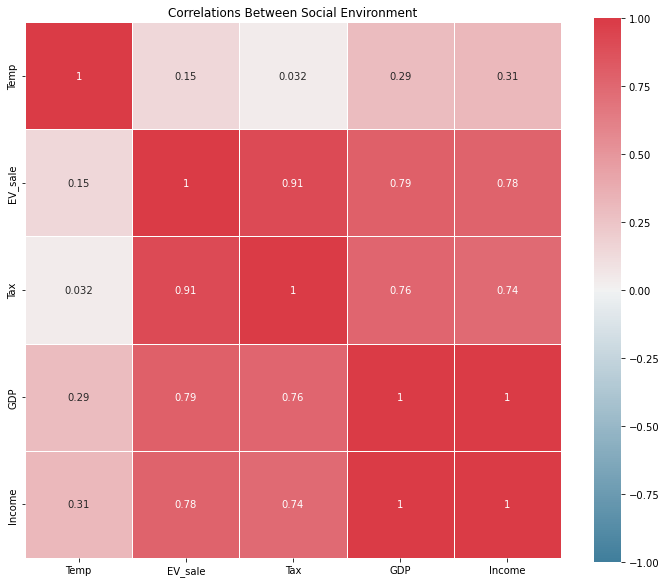

In [153]:
plot_heatmap("Correlations Between Social Environment", d_var,figsize=(12,10))

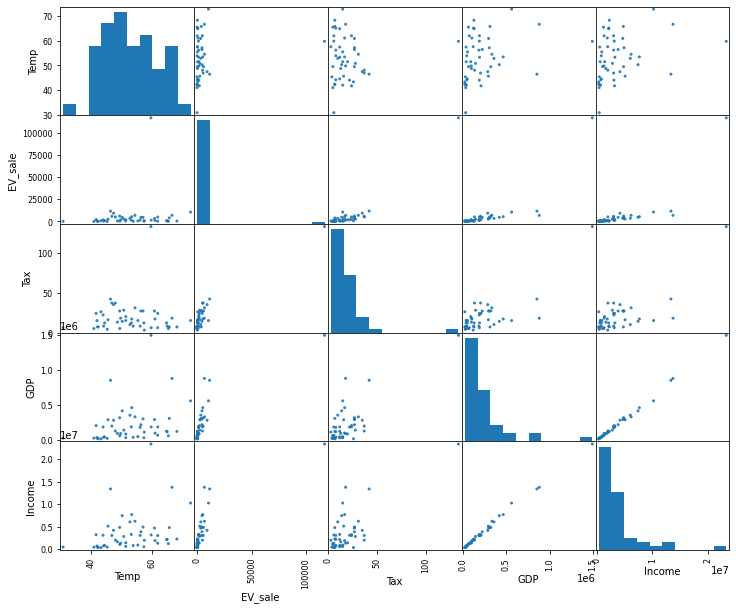

In [152]:
from pandas.plotting import scatter_matrix
ax = scatter_matrix(d_var, figsize=(12,10), alpha=0.9)